In [1]:
# from Demonstration graphs.py

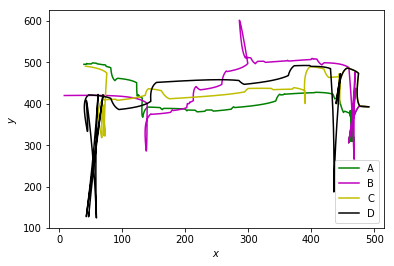

In [4]:
# -*- coding: utf-8 -*-
from __future__ import division

__authors__ = 'Noam Benelli'

"""
a function that takes one dictionary as input and
creats a graph of several colored plots as output
"""
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import json

sys.path.append('../mothpy')

from kalman import kalman_filter
from shapes import circle,square , cx ,cy

fig = plt.figure()
   
def plot(kalman_dict):
    num_it = len(kalman_dict)
    # graphic function - shows only kalman trajectories, saves as file
    color_wheel =['-g','-m','-y','-k']
    for i in range(num_it): #present the different kalman trajectories
        kzip = zip(*kalman_dict["Kalman_list{0}".format(i)])
        kx,ky = kzip[0],kzip[1]       
        plt.plot(kx,ky,color_wheel[i])

    # pylab.ylim(200,800)
    # ylab.xlim(0,600)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    # pylab.title(title)
    plt.legend(('A','B','C','D'),loc='best')
    #pylab.legend(loc='upper left')  
    # pylab.show()
    # pylab.savefig(title + '.png')
    #pylab.clf()
    
def disp(dic,disp_size):
    old_list = dic["diff_list{0}".format(0)]
    new_list = []
    new_dic = {}
    for tup in old_list:
        new_tup = (tup[0],tup[1]+disp_size,tup[2],tup[3],tup[4])
        new_list.append(new_tup)
    new_dic["diff_list{0}".format(0)]= new_list
    return new_dic
    
#if __name__ == "__main__":
for i in range(1):
    with open('data1.json') as data_file2:  
        dict_list = json.load(data_file2) 
    new_dict ={}
    kalman_dict0 = disp(dict_list[8],0)
    kalman_dict1 = disp(dict_list[18],0)
    kalman_dict2 = disp(dict_list[28],0)
    kalman_dict3 = dict_list[38]

    new_dict["diff_list0"] = kalman_dict0["diff_list{0}".format(0)] 
    new_dict["diff_list1"] = kalman_dict1["diff_list{0}".format(0)]
    new_dict["diff_list2"] = kalman_dict2["diff_list{0}".format(0)]
    new_dict["diff_list3"] = kalman_dict3["diff_list{0}".format(0)]

    
    kalman_dict = kalman_filter(new_dict)
    # title1 = 'Demonstration of Large Final Sweeps Casting' +str(i)
    # title2 = 'Demonstration of different navigation strategies'
    plot(kalman_dict)

In [5]:
fig.savefig('/Users/alex/Downloads/tmp.svg') # and a bit of inkscape